## Training a Regression Neural Network Model with Keras in Tensorflow

In this exercise, we will show you how to train an artificial neural network using Keras in Tensorflow. We will implement the same artificial neural network you have just seen: a neural network for regression with one hidden layer, and trained using gradient descent.

For more information about Keras, consult the [online documentation](https://keras.io/api/).
Tensorflow is a general purpose high-performance computing language which Keras is built on top of to allow us to easily define and train neural networks.

To get started, let us import Keras, along with other libraries.

In [65]:
import numpy as np
import matplotlib.pyplot as plt
import time
import tensorflow.keras as keras

### Create and Visualize a Data Set

We will create some data to use for training. Notice the training examples contained in `X` are two dimensional feature vectors.

(50, 2)
[ 0.          1.00833417  2.02669331  3.04520207  4.05418342  5.04425539
  6.00642473  6.93217687  7.81356091  8.6432691   9.41470985 10.1220736
 10.76039086 11.32558185 11.8144973  12.22494987 12.55573603 12.8066481
 12.97847631 13.07300088 13.09297427 13.04209367 12.92496404 12.74705212
 12.51463181 12.23472144 11.91501372 11.5637988  11.1898815  10.80249329
 10.41120008 10.02580662  9.65625857  9.31254306  9.00458898  8.74216772
  8.53479557  8.39163859  8.32142109  8.33233841  8.43197505  8.62722889
  8.92424228  9.32834063  9.84397926 10.47469882 11.22308996 12.09076742
 13.07835391 14.18547387]


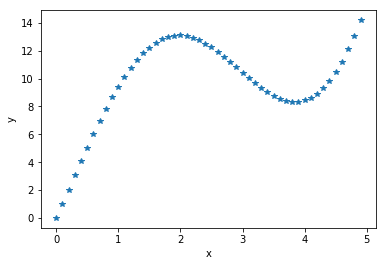

In [66]:
# Generate the raw data
x = np.arange(0, 5, 0.1)
y = x ** 2 + 10*np.sin(x)

# Add a bias column vector of 1's to the vector x to get our design matrix X
X = np.concatenate([x, np.ones(x.shape)]).reshape(2, -1).T 
print(X.shape)
print(y)

# Visualize the data
plt.plot(X[:, 0], y, '*')
plt.xlabel('x')
plt.ylabel('y')
plt.show()

The steps to define and train a neural network using Keras are:
1. Define the model structure.
2. Define the optimization function, i.e., the variant of gradient descent you want to use.
3. Define the loss function to minimize.
4. "Fit" the model on training data for $M$ epochs.

The "fitting" process propagates the data forward in the network, computes the loss value, computes the gradients for the weights, and updates the weights for $M$ times. 

We will walk you through those steps:

### Step 1. Define Model Structure

We will use the Keras [Sequential class](https://keras.io/api/models/sequential/) to group a linear stack of layers layers. We will use the [Dense class](https://keras.io/api/layers/core_layers/dense/) to create each layer. 

`model.summary()` is an incredibly useful tool. It shows the number of parameters per layer. 

In [67]:
model = keras.Sequential()

hidden_layer_1 = keras.layers.Dense(units=200, input_shape=(2,), activation='relu',
                                    use_bias=False, kernel_initializer='random_normal')
model.add(hidden_layer_1)

output_layer = keras.layers.Dense(units=1, activation=None, 
                                  use_bias=False, kernel_initializer='random_normal')
model.add(output_layer)

model.summary()


Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_6 (Dense)              (None, 200)               400       
_________________________________________________________________
dense_7 (Dense)              (None, 1)                 200       
Total params: 600
Trainable params: 600
Non-trainable params: 0
_________________________________________________________________


Let's break this down. Our network should comprise of 3 layers: an input layer, one hidden layer and an output layer.
The code above creates the hidden and output layers.

<b>Hidden layer</b>

We pass the following arguments to the Dense function:

`units`: dimensionality of the output space. We can view this as the number of nodes in the layer itself.<br>
`activation`: Transition (also called activation) function to use. If you don't specify anything, no activation is applied (ie. "linear" activation: a(x) = x).<br>
`use_bias`: whether the layer uses a bias vector.<br>
`kernel_initializer`: Initializer for the weights matrix.<br>
`input_shape`: dimensionality of the input layer.<br>

- Using `Dense` with an input shape of 2, we are specifying the input layer's dimensions. The input layer should have 2 dimensions to match the feature dimension of each of the 50 training data points in $\mathbf{X}$.
- Using `Dense` with 200 units, we specify a fully-connected layer with 200 hidden units. This is equivalent to multiplying the 2-dimensional input with $\mathbf{W}_1$ of shape $2 \times 200$. We also specify the `ReLU` transtion (also called activation) function.

<b>Output Layer</b>:
- The output layer is a single dense layer. Since our model will predict one value, we specify 1 unit. This is equivalent to multiplying the 200-dimensional hidden layer vector with $\mathbf{W}_2$ of shape $200 \times 1$. 

We initialize the weights of the network with random normal values. Since $\mathbf{X}$ already contains a bias value, we avoid bias terms in the network.

### Step 2. Define the Optimization Function

In [68]:
lr = 0.001 # specify learning rate

optimizer = keras.optimizers.SGD(learning_rate=lr)
training_batch_size = len(y)

Keras does not provide vanilla gradient descent. Instead, the basic variant it provides is Stochastic Gradient Descent (SGD). For more information, see the [SGD online documentation](https://keras.io/api/optimizers/sgd/). We can use SGD to behave like vanilla gradient descent by setting the `training_batch_size` to the number of data points.

What does this do? Although the loss is calculated using all data points, SGD computes the gradients of weights using `training_batch_size` number of data points. So, when the `training_batch_size` is smaller than the number of training data points, SGD _approximates_ the gradients of weights (this is done for various reasons, but we will not discuss it here). To compute exact gradients we just set the `training_batch_size` to number of training points `len(y)`. 

### Step 3. Define the loss function
Since we are constructing a neural network for regression, we will use the mean squared error as our loss function to minimize. 

In [69]:
loss = keras.losses.MeanSquaredError()

### Step 4. Compile the model
Attach the optimizer and loss function to the model.

In [70]:
model.compile(optimizer=optimizer,loss=loss)

### Step 5. Fit the Model on Training Data

In [71]:
t0 = time.time() # start time

M = 1000 # number of epochs to train

# Fit the model on training data
history = model.fit(
    X,
    y,
    epochs=M,
    batch_size= training_batch_size,
    verbose=0, # no progress bar. You can comment out this line to see the loss per epoch
)

t1 = time.time() # stop time

print('Elapsed time: %.2fs' % (t1-t0))

Elapsed time: 1.82s


It is possible that the Keras model takes much longer to train than a version built from scratch with basic Numpy. This is because of the massive overhead required to setup and train the model. However, as the number of training points increases and the network becomes more complex, Keras (and other Machine Learning libraries) scale much better than pure-Numpy implementations---even better when you use a GPU. For this reason, developers and researchers almost always use libraries like Tensorflow and Keras to train networks.

### Visualize the Results

Average loss for 1000 epochs = 12.554273083686828


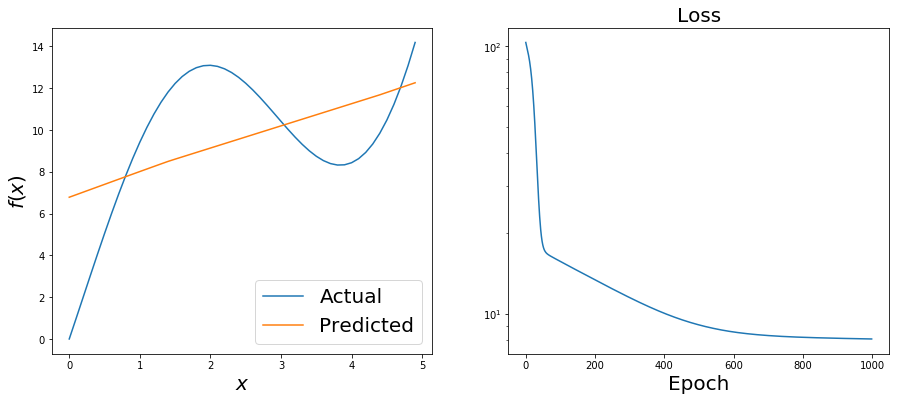

In [72]:
outputs = [layer.output for layer in model.layers]                  # all layer outputs
get_activations = keras.backend.function(model.input, outputs)   # evaluation function
    
Z = [X] + get_activations([X]) # predicted values for raw data x are in the first column of Z

losses = history.history['loss']
average = sum(losses)/M
print('Average loss for ' + str(M) + ' epochs = ' + str(average))

fig, axarr = plt.subplots(1, 2)
fig.set_figwidth(15)
fig.set_figheight(6)

axarr[0].plot(x, y)
axarr[0].plot(x, Z[-1].flatten())
axarr[0].set_ylabel('$f(x)$',size = 20)
axarr[0].set_xlabel('$x$', size = 20)
axarr[0].legend(['Actual', 'Predicted'], fontsize = 20)

axarr[1].semilogy(losses)
axarr[1].set_title('Loss', size = 20)
axarr[1].set_xlabel('Epoch', size = 20)

plt.show()

Now, our predictions might not look very good on first glance. But consider that we have only used one hidden layer in this model! This performance can be improved by increasing the number of training epochs ($M$) and/or increasing the complexity of the model structure. 

## Graded Cell

For this assignment, play around with the neural network implementation above and compare your results every time you train the network. Pay attention to the time it takes to train the network, and the resulting loss. 

Below are some ideas for things you can try:

* Use SGD rather than vanilla gradient descent by adjusting the batch size (ie. change the value of the variable `training_batch_size`)
* Adjust the learning rate
* Change the number of Epochs ($M$) by experimenting with different values for the variable `M`.
* Add more hidden layers and/or experiment with different values for the `unit` parameter in the hidden layers to change the number of nodes in the hidden layers.
* Modify the data set.

In the markdown cell below, summarize what you have tried, how it affected the performance of the network, and why you think that is.

##### Write Your Summary Here: double click to open markdown cell

Throughout the neural network implementation above, I trained the network by adjusting the batch size to training_batch_size using SGD. I also adjusted the learning rate by changing the number of Epochs (M) by experimenting with different values for the variable. I changed the number of Epochs to 1000. This affected the performance of the network by because the elapsed time was 1.82 secs which took less time to train. I believe it took less time for 1000 Epochs be trained because it depends on the number of epochs which is the number of complete passes through a training dataset. 